# Modelo de detección de emociones en perros

Conectar con Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


Importar librerías

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
import seaborn as sns
from tensorflow.keras.applications import VGG16 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers
from sklearn.metrics import confusion_matrix

Obtener las imágenes

In [ ]:
%cd "/content/drive/MyDrive/IA/Proyecto"
path = "/content/drive/MyDrive/IA/Proyecto"

base_dir = 'images'
train_dir = os.path.join(base_dir,'train')
test_dir = os.path.join(base_dir, 'test')

/content/drive/MyDrive/IA/Proyecto


Data augmentation

Se voltearon las imágenes vertical y horizontalmente y se rotaron las imágenes 40 grados porque las fotos de perros suelen ser tomadas desde distintos ángulos. También se alargaron las imágenes para obtener escenarios con perros de distintas dimensiones.

Found 900 images belonging to 3 classes.


<Figure size 640x480 with 0 Axes>

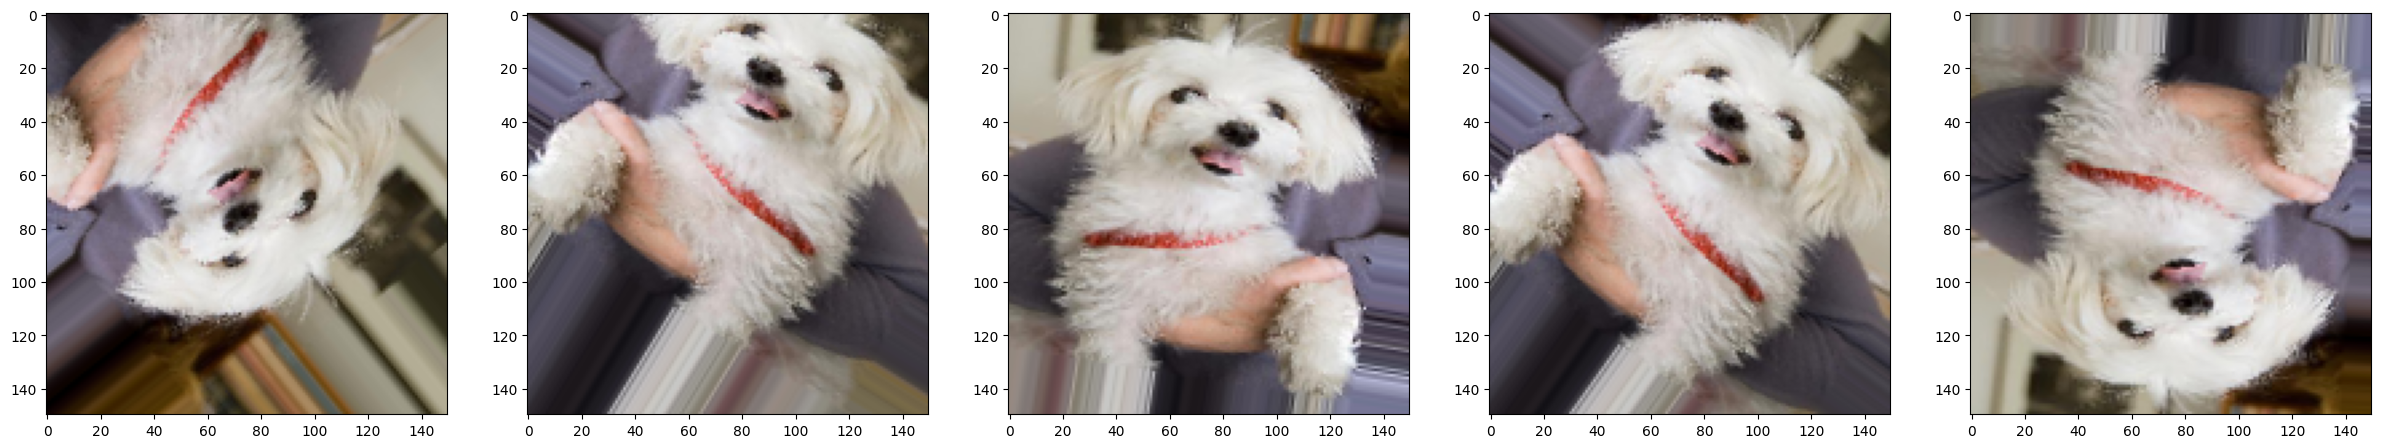

In [ ]:
train_datagen = ImageDataGenerator(
							rescale = 1./255,
							rotation_range = 40,
							width_shift_range = 0.2,
							height_shift_range = 0.2,
							shear_range = 0.3,
							horizontal_flip = True,
							vertical_flip = True,)

train_generator = train_datagen.flow_from_directory(
							train_dir,
							target_size = (150, 150),
							batch_size = 8,
							class_mode ='categorical',
							)

plt.figure()

f, axarr = plt.subplots(1, 5, figsize=(30, 8)) 

for i in range(5) :
  axarr[i].imshow(train_generator[0][0][0])

Definición de las capas del modelo

Para la versión dos del modelo también se utilizó VGG16.

In [ ]:
model = models.Sequential()

conv_base= VGG16(include_top = False,
								input_shape = (150,150,3),
								classes = 3)

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(3,activation='softmax'))

for layer in conv_base.layers[:-1]:
	conv_base.trainable = False 

for layer in conv_base.layers[-1:]:
	conv_base.trainable = True 
 
model.summary()

model.compile(loss='categorical_crossentropy',
						optimizer=optimizers.RMSprop(learning_rate=2e-5),
						metrics=['acc'])

58889256/58889256 [==============================] - 0s 0us/step
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 256)               2097408   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                       

Entrenamiento del modelo

Epoch 1/40
113/113 [==============================] - 205s 2s/step - loss: 1.0835 - acc: 0.3856
Epoch 2/40
113/113 [==============================] - 12s 105ms/step - loss: 0.9949 - acc: 0.4933
Epoch 3/40
113/113 [==============================] - 12s 106ms/step - loss: 0.9362 - acc: 0.5411
Epoch 4/40
113/113 [==============================] - 12s 102ms/step - loss: 0.8778 - acc: 0.5622
Epoch 5/40
113/113 [==============================] - 12s 108ms/step - loss: 0.8640 - acc: 0.5911
Epoch 6/40
113/113 [==============================] - 12s 107ms/step - loss: 0.7691 - acc: 0.6522
Epoch 7/40
113/113 [==============================] - 12s 102ms/step - loss: 0.6952 - acc: 0.6856
Epoch 8/40
113/113 [==============================] - 11s 101ms/step - loss: 0.6256 - acc: 0.7456
Epoch 9/40
113/113 [==============================] - 12s 107ms/step - loss: 0.5820 - acc: 0.7533
Epoch 10/40
113/113 [==============================] - 12s 108ms/step - loss: 0.5849 - acc: 0.7600
Epoch 11/40
113/113 [

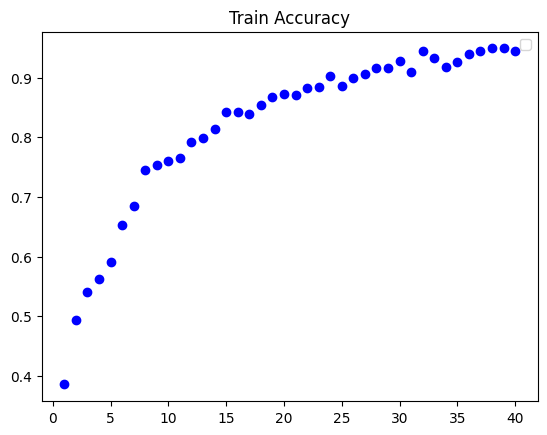

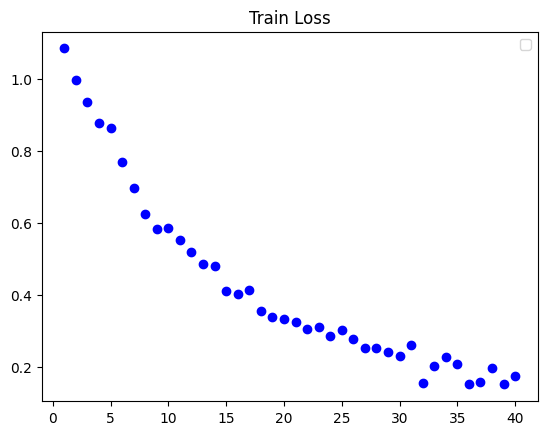

In [ ]:
history = model.fit(train_generator, epochs = 40)
				
acc = history.history['acc']
loss = history.history['loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs,acc,'bo')
plt.title('Train Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo')
plt.title('Train Loss')
plt.legend()

plt.show()

Evaluación del modelo



In [ ]:
test_datagen = ImageDataGenerator(1./255)

test_generator = test_datagen.flow_from_directory(
					test_dir,
					target_size = (150, 150),
					batch_size = 8,
					class_mode= 'categorical')

test_loss, test_acc = model.evaluate(test_generator, steps = 40)

print('\nTest accuracy : ', test_acc)


Found 2100 images belonging to 3 classes.


/usr/local/lib/python3.10/dist-packages/keras/preprocessing/image.py:1861: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


40/40 [==============================] - 77s 2s/step - loss: 55.1743 - acc: 0.7281

Test accuracy :  0.7281249761581421


263/263 [==============================] - 380s 1s/step


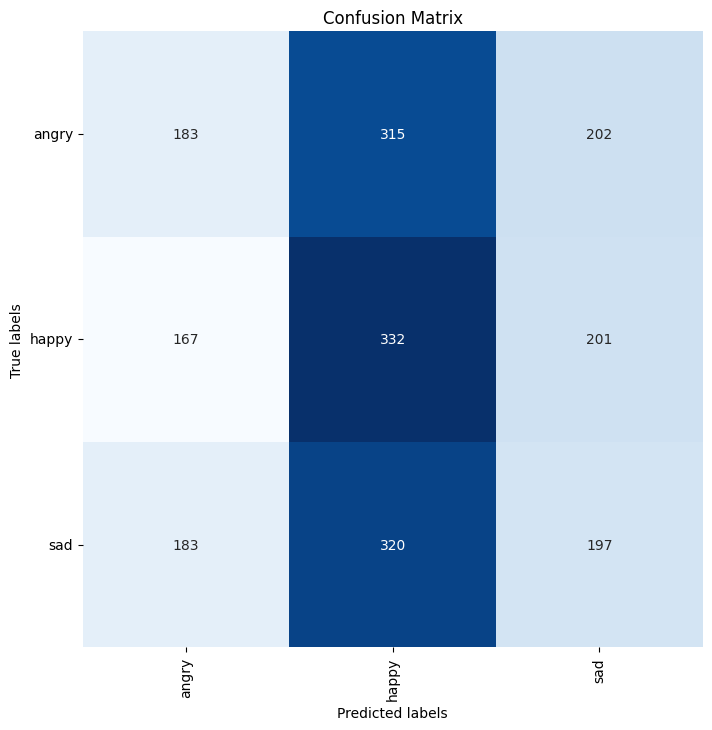

In [ ]:
# Get class labels
true_labels = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Model predictions
predictions = model.predict(test_generator)
predicted_labels = np.argmax(predictions, axis=1)

# Create confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Create figure
plt.figure(figsize=(8, 8))
ax = plt.gca()

# Create heatmap with seaborn
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax)

# Add labels to axis
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.set_xticklabels(class_labels, rotation=90)
ax.set_yticklabels(class_labels, rotation=0)

# Show confusion matrix
plt.show()

Referencias

[1] Y. Mao and Y. Liu,"Pet dog facial expression recognition based on convolutional neural network and improved whale optimization algorithm". Springer Nature Scientific Reports. Feb. 2023. doi: 10.1038/s41598-023-30442-0